In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [28]:
data = pd.read_csv('breast-cancer.csv');

data_numeric = data.copy()

label_encoders = {}
categorical_columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat', 'Class']

for column in categorical_columns:
    le = LabelEncoder()
    data_numeric[column] = le.fit_transform(data_numeric[column])
    label_encoders[column] = le


data_numeric

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,2,2,2,0,2,3,1,3,0,1
1,3,0,2,0,1,1,1,1,0,0
2,3,0,6,0,1,2,0,2,0,1
3,2,2,6,0,2,3,1,2,1,0
4,2,2,5,4,2,2,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...
281,3,0,5,5,2,2,0,2,0,0
282,3,2,4,4,2,2,0,2,1,0
283,1,2,5,5,2,2,1,5,0,0
284,3,2,2,0,1,2,1,2,0,0


In [31]:
x = data_numeric.drop('Class', axis=1)
y = data_numeric['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [32]:
modelo = MLPClassifier()
modelo.fit(x_train, y_train)

/home/raul/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [41]:
modelo = MLPClassifier(max_iter=560, verbose=True)
modelo.fit(x_train, y_train)

Iteration 1, loss = 1.16443845
Iteration 2, loss = 1.02525448
Iteration 3, loss = 0.90474066
Iteration 4, loss = 0.80361359
Iteration 5, loss = 0.72039258
Iteration 6, loss = 0.66461221
Iteration 7, loss = 0.62830237
Iteration 8, loss = 0.60653773
Iteration 9, loss = 0.59737023
Iteration 10, loss = 0.60047894
Iteration 11, loss = 0.60287480
Iteration 12, loss = 0.60640538
Iteration 13, loss = 0.60902526
Iteration 14, loss = 0.61061627
Iteration 15, loss = 0.60860081
Iteration 16, loss = 0.60415321
Iteration 17, loss = 0.59793516
Iteration 18, loss = 0.59146164
Iteration 19, loss = 0.58629983
Iteration 20, loss = 0.58152802
Iteration 21, loss = 0.57828905
Iteration 22, loss = 0.57585625
Iteration 23, loss = 0.57425357
Iteration 24, loss = 0.57309046
Iteration 25, loss = 0.57200206
Iteration 26, loss = 0.57152145
Iteration 27, loss = 0.57108633
Iteration 28, loss = 0.57135754
Iteration 29, loss = 0.57137039
Iteration 30, loss = 0.57048569
Iteration 31, loss = 0.56844558
Iteration 32, los

/home/raul/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (560) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=560, verbose=True)

In [45]:
rede_neural = MLPClassifier(max_iter=560, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(x_train, y_train)

Iteration 1, loss = 0.69999672
Iteration 2, loss = 0.68019737
Iteration 3, loss = 0.66528800
Iteration 4, loss = 0.65364176
Iteration 5, loss = 0.64681829
Iteration 6, loss = 0.63726586
Iteration 7, loss = 0.62837896
Iteration 8, loss = 0.62126696
Iteration 9, loss = 0.61426504
Iteration 10, loss = 0.60888112
Iteration 11, loss = 0.60380675
Iteration 12, loss = 0.59914501
Iteration 13, loss = 0.59410850
Iteration 14, loss = 0.58966990
Iteration 15, loss = 0.58664268
Iteration 16, loss = 0.58279635
Iteration 17, loss = 0.58005106
Iteration 18, loss = 0.57765185
Iteration 19, loss = 0.57533160
Iteration 20, loss = 0.57307819
Iteration 21, loss = 0.57111502
Iteration 22, loss = 0.57077535
Iteration 23, loss = 0.57007095
Iteration 24, loss = 0.56890034
Iteration 25, loss = 0.56694415
Iteration 26, loss = 0.56530832
Iteration 27, loss = 0.56350645
Iteration 28, loss = 0.56195283
Iteration 29, loss = 0.56092632
Iteration 30, loss = 0.55911724
Iteration 31, loss = 0.55662013
Iteration 32, los

MLPClassifier(max_iter=560, verbose=True)

In [47]:
previsoes = modelo.predict(x_test)
previsoes

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1])

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,previsoes)

0.7068965517241379

In [52]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_test, previsoes)

array([[34,  6],
       [11,  7]])

/home/raul/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.7068965517241379

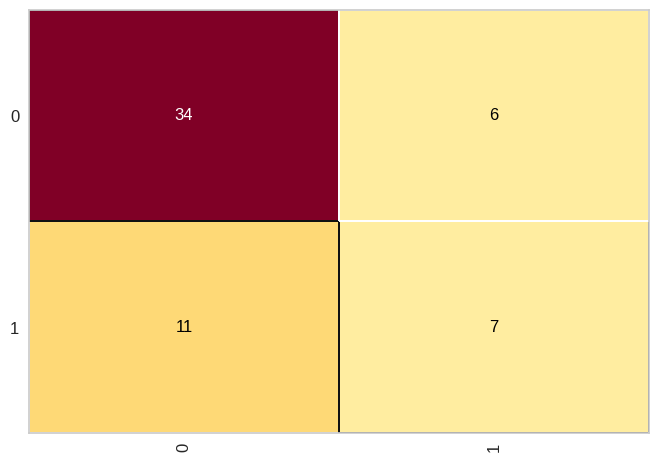

In [53]:
cm = ConfusionMatrix(modelo)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [56]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.54      0.39      0.45        18

    accuracy                           0.71        58
   macro avg       0.65      0.62      0.63        58
weighted avg       0.69      0.71      0.69        58



**Veja como implementar o backpropagation em python:**
https://www.askpython.com/python/examples/backpropagation-in-python
https://www.deeplearningbook.com.br/algoritmo-backpropagation-em-python/
